<h1 align='middle'>Clustering Data with Gaussian Mixture Model</h1>
<p align='middle'>Homework 6 for Deep Learning, Spring 2023</p>
<p align='middle'>Deadline: 2023.05.10 11:59:00 PM</p>

### Introduction
The UCI Iris dataset contains features of 150 iris plants from 3 species. In this homework, you are to
apply Gaussian mixture models to cluster the data points.

### Clustering Data with Gaussian Mixture Model
The **homework6** folder contains the dataset fle and preprocessing code (**homework6.ipynb**)

You need to implement the EM algorithm for Gaussian mixture models as described in class, and
visualize the results using scatter plots. You should experiment with varying number of clusters (2
~10) and number of iterations. When the number of clusters match the number of species, you should
also check if the algorithm assigns plants from the same species to the same cluster.

**Note**: When the number of clusters is large, occasionally you may have singular covariance estimates.
In this case you can add a small diagonal matrix to the covariance estimate, so that the E-step can
proceed.

**Optional**: Try the GMM implementation in sklearn and compare the results with your handcrafted GMM outputs.

### Attention
- You need to submit your code and a short report (**in PDF format**).
- You are required to implement the algorithm **from scratch**; machine learning toolkits such as
sklearn is not allowed.
- **Plagiarism is not permitted.**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import six
from six.moves import range

from copy import deepcopy
from pdb import set_trace as st

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

EPSILON = 1e-6

In [3]:
X = np.loadtxt('iris.data', dtype='object', delimiter=',')
Y = X[:,-1]
X = X[:, :-1].astype('f')
X.shape, Y.shape, Y.dtype

((150, 4), (150,), dtype('O'))

`X` is a `NxK` float matrix where each row (`X[i]`) corresponds to a data point.

In [4]:
def get_prob(mean, cov, x):
    det = np.linalg.det(cov)
    while det == 0:
        cov += np.eye(cov.shape[0]) * EPSILON
        det = np.linalg.det(cov)
        
    diff = (x - mean).reshape([4,1])
    return np.exp(-0.5 * diff.transpose() @ np.linalg.inv(cov) @ diff) / np.sqrt(np.power(2 * np.pi, 4) * det)

In [5]:
def gmm(X, n_clusters, n_iter, seed=12345):
    
    mean = np.zeros([n_clusters, 4])
    cov = np.zeros([n_clusters, 4, 4])
    
    # randomly assign clusters at first
    np.random.seed(seed)
    cluster_assignments = np.random.randint(0, n_clusters, size=[X.shape[0]])
    
    for iter_idx in range(n_iter):
        prev_cluster_assignments = deepcopy(cluster_assignments)
        
        # calculate means and covariances
        for i in range(n_clusters):
            mean[i] = X[cluster_assignments==i].mean(axis=0)
            cov[i] =  np.cov(X[cluster_assignments==i], rowvar=False)

        # re-calculate clusters
        for i in range(X.shape[0]):
            max_prob = 0
            max_prob_cluster = -1
            for j in range(n_clusters):
                prob = get_prob(mean[j], cov[j], X[i])
                if prob > max_prob:
                    max_prob = prob
                    max_prob_cluster = j
            cluster_assignments[i] = max_prob_cluster
            
        if np.all(prev_cluster_assignments == cluster_assignments):
            print(f'breaking; converged at iter {iter_idx}')
            break
    
    return cluster_assignments, mean, cov

n_clusters = 3     # You may want to tune the number of classes
cluster_assignments, mean, cov = gmm(X, n_clusters, 500)  # You may want to tune the number of iterations

breaking; converged at iter 7


## Visualization: a Cross Section (first attempt)

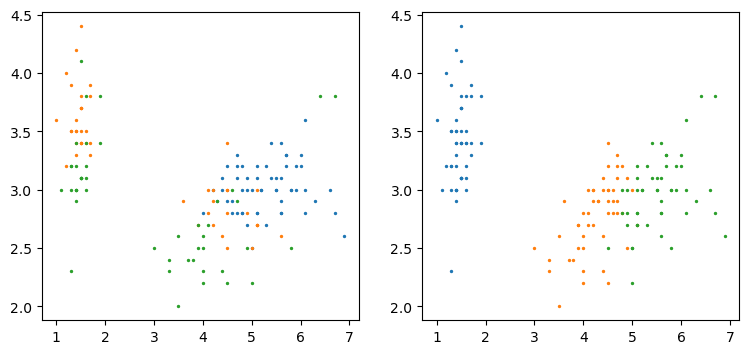

In [6]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(n_clusters):
    plt.scatter(X[cluster_assignments==k, 2], X[cluster_assignments==k, 1], s=2)
plt.subplot(122)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

## Visualization: PCA Projection (first attempt)

In [7]:
evals, evecs = np.linalg.eigh(np.cov(X.T))
to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
crds = to_crd(X)

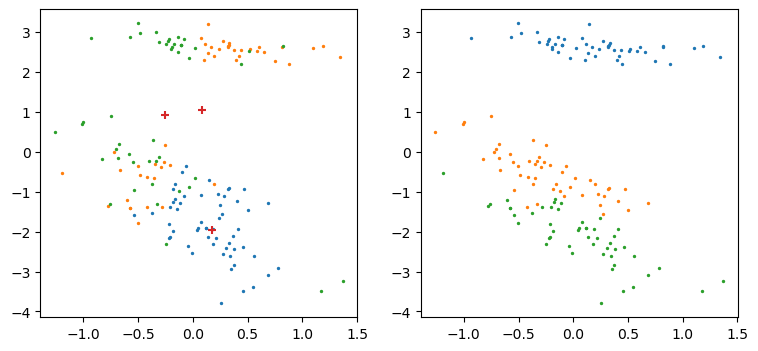

In [8]:
plt.figure(figsize=(9,4))
plt.subplot(121)
for k in range(n_clusters):
    plt.scatter(crds[cluster_assignments==k, 0], crds[cluster_assignments==k, 1], s=2)
plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
plt.subplot(122)
for k in np.unique(Y):
    plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)

## Second attempt

In [9]:
def do_exp(n_clusters, n_iters, seed):
    cluster_assignments, mean, cov = gmm(X, n_clusters, n_iters, seed=seed)  # You may want to tune the number of iterations

    plt.figure(figsize=(9,9))
    plt.subplot(221)
    for k in range(n_clusters):
        plt.scatter(X[cluster_assignments==k, 2], X[cluster_assignments==k, 1], s=2)
    plt.subplot(222)
    for k, class_name in enumerate(np.unique(Y)):
        plt.scatter(X[Y==class_name, 2], X[Y==class_name, 1], s=2)

    evals, evecs = np.linalg.eigh(np.cov(X.T))
    to_crd = lambda x: ((x-x.mean(axis=0))@evecs)[:,-2:]
    crds = to_crd(X)

    plt.figure(figsize=(9,9))
    plt.subplot(223)
    for k in range(n_clusters):
        plt.scatter(crds[cluster_assignments==k, 0], crds[cluster_assignments==k, 1], s=2)
    plt.scatter(to_crd(mean)[:,0], to_crd(mean)[:,1], s=30, marker='+')
    plt.subplot(224)
    for k in np.unique(Y):
        plt.scatter(crds[Y==k, 0], crds[Y==k, 1], s=2)

breaking; converged at iter 8


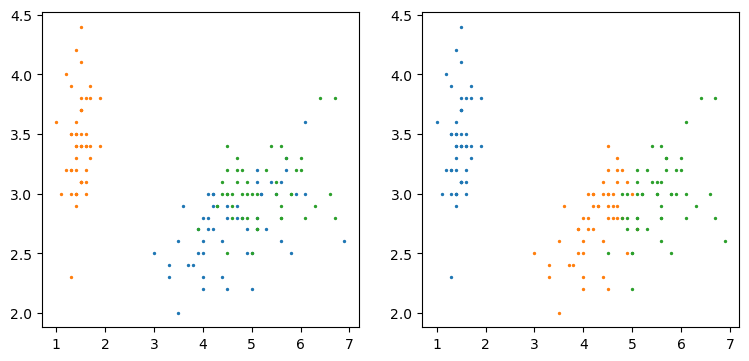

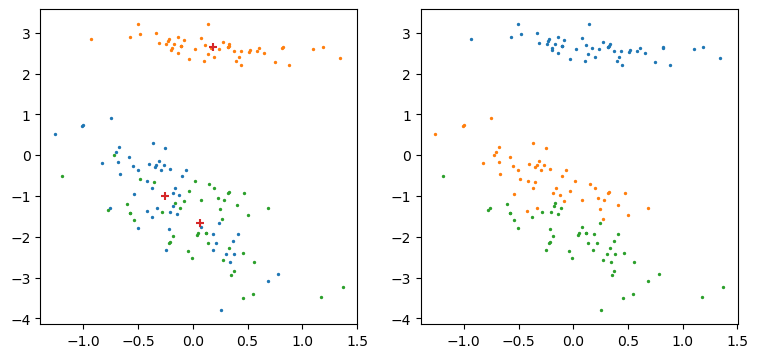

In [10]:
do_exp(n_clusters=3, n_iters=500, seed=12312)

## 2 Clusters

breaking; converged at iter 8


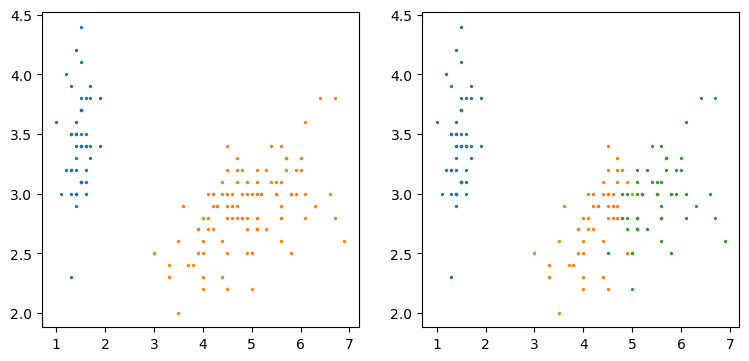

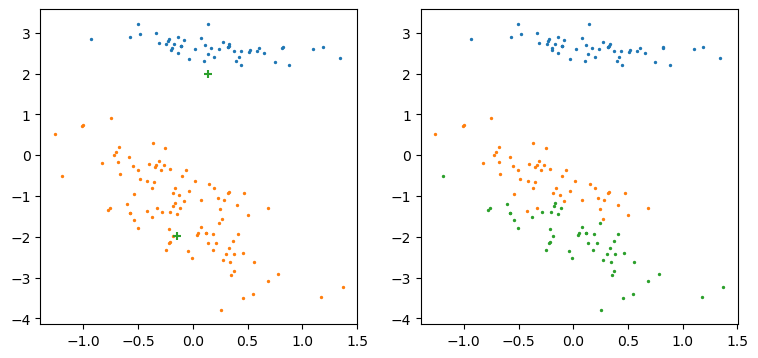

In [11]:
do_exp(n_clusters=2, n_iters=500, seed=12312)

## 5 Clusters

breaking; converged at iter 9


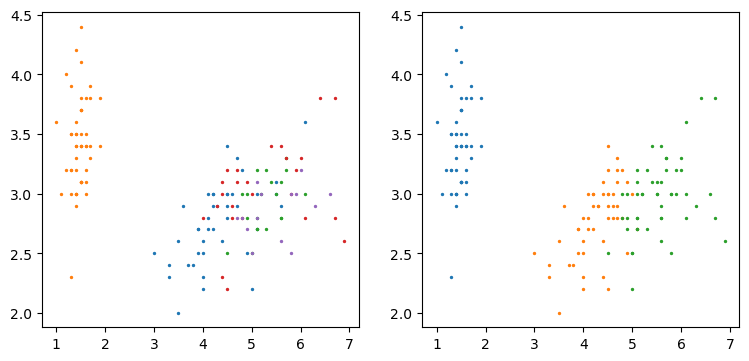

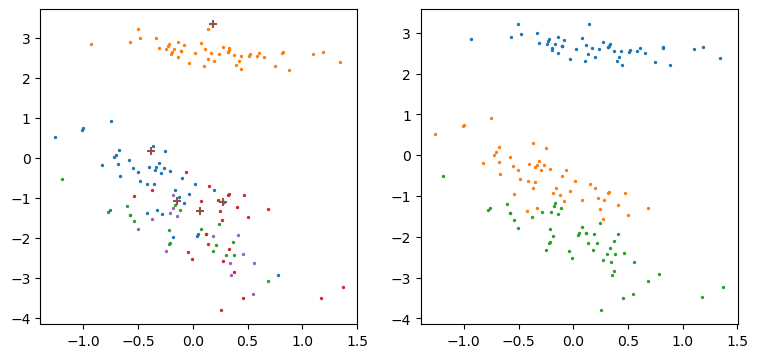

In [19]:
do_exp(n_clusters=5, n_iters=500, seed=123123)

## 10 Clusters

breaking; converged at iter 10


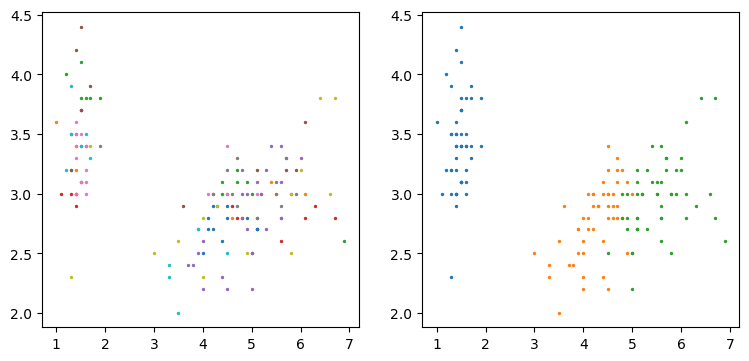

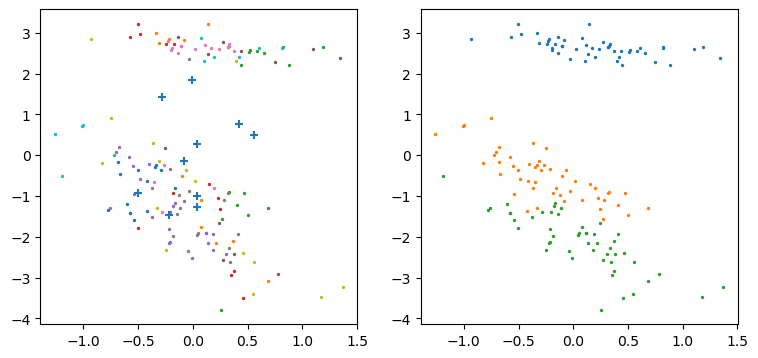

In [23]:
do_exp(n_clusters=10, n_iters=500, seed=12312)

## Versicolor vs Virginica

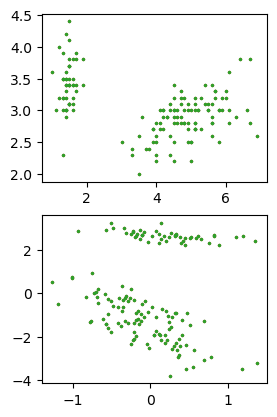

In [18]:
plt.subplot(222)
for k, class_name in enumerate(np.unique(Y)):
    plt.scatter(X[:, 2], X[:, 1], s=2)

plt.subplot(224)
for k in np.unique(Y):
    plt.scatter(crds[:, 0], crds[:, 1], s=2)